# 04_1.One Sample t-test
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 세션 다시 시작

In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [ ]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
ost_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/04_1.OST.csv', encoding="cp949")
ost_df.head()

,무게1,무게2,무게3,무게4,무게5,무게6
0,242.0,242.0,242.0,242.0,242.0,242.0
1,244.3,244.3,244.3,244.3,244.3,244.3
2,304.9,301.0,301.0,307.9,309.9,307.9
3,305.2,304.0,304.0,305.2,310.2,305.2
4,304.0,304.0,304.0,307.0,309.0,307.0


### 2.2 자료구조 살펴보기

In [ ]:
ost_df.shape

(102, 6)

In [ ]:
ost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   무게1     102 non-null    float64
 1   무게2     102 non-null    float64
 2   무게3     102 non-null    float64
 3   무게4     102 non-null    float64
 4   무게5     102 non-null    float64
 5   무게6     102 non-null    float64
dtypes: float64(6)
memory usage: 4.9 KB


In [ ]:
ost_df.columns

Index(['무게1', '무게2', '무게3', '무게4', '무게5', '무게6'], dtype='object')

## 3.기술통계

In [ ]:
# 수치형 변수
ost_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
무게1,100.0,317.91,6.77,304.0,314.38,317.4,322.58,331.8
무게2,100.0,318.61,6.98,301.0,315.18,318.2,323.38,332.6
무게3,100.0,318.62,6.97,301.0,315.18,318.2,323.38,332.6
무게4,100.0,320.88,6.84,305.2,317.38,320.4,325.58,334.8
무게5,100.0,322.91,6.77,309.0,319.38,322.4,327.58,336.8
무게6,100.0,317.43,6.76,305.2,312.90,317.9,320.75,334.8


In [ ]:
ost_df.agg({"무게1": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T \
    .round(2)

,count,mean,std,min,max,median,skew,kurtosis
무게1,100.0,317.91,6.77,304.0,331.8,317.4,0.02,-0.47


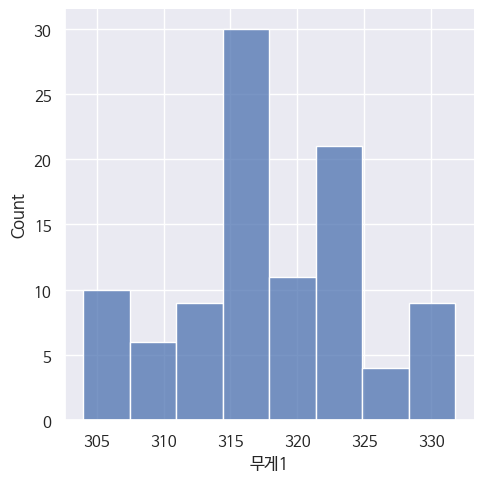

In [ ]:
# 한글 폰트 인식
sns.displot(data = ost_df,
            x = "무게1",
            kind = "hist")
plt.show()

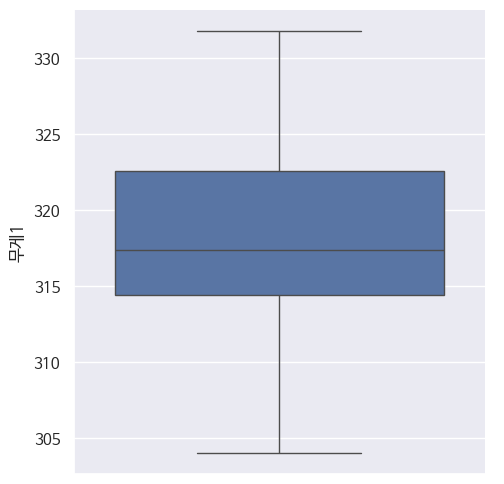

In [ ]:
# 한글 폰트 인식
sns.catplot(data = ost_df,
            y = "무게1",
            kind = "box")
plt.show()

## 4.t-test(모수통계)

### 4.0 scipy.stats와 비교

In [ ]:
# scipy.stats.ttest_1samp
stats.ttest_1samp(ost_df["무게1"], popmean = 320, alternative = "two-sided")

TtestResult(statistic=-3.0871554080560073, pvalue=0.0026215423576591485, df=99)

### 4.1 양측검정(two-sided)

In [ ]:
# 이상치제거전: p = 0.005, p < 0.05 이므로 귀무가설(H0) 기각 -> 차이있음
# 이상치제거후: p = 0.003, p < 0.05 이므로 귀무가설(H0) 기각 -> 차이있음
pg.ttest(ost_df["무게1"], 320, alternative = "two-sided").round(3)

# 5.정규분포 가정 검정후 다시 분석

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.087,99,two-sided,0.003,"[316.57, 319.25]",0.309,9.318,0.864


### 4.2 단측 검정(less)

In [ ]:
# two-sided
# p = 0.0491, p < 0.0491 이므로 귀무가설(H0) 기각 -> 차이있음
pg.ttest(ost_df["무게2"], 320, alternative = "two-sided").round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.9925,99,two-sided,0.0491,"[317.22, 319.99]",0.1992,0.737,0.5053


In [ ]:
# less
# p = 0.0491 -> p = 0.025, p < 0.05 이므로 귀무가설(H0) 기각 -> 320보다 작다
pg.ttest(ost_df["무게2"], 320, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.992,99,less,0.025,"[-inf, 319.77]",0.199,1.473,0.631


In [ ]:
# two-sided
# p = 0.0502, p >= 0.05 이므로 귀무가설(H0) 채택 -> 차이없음
pg.ttest(ost_df["무게3"], 320, alternative = "two-sided").round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.9827,99,two-sided,0.0502,"[317.24, 320.0]",0.1983,0.723,0.5014


In [ ]:
# less
# p = 0.0502 -> p = 0.025, p >= 0.05 이므로 귀무가설(H0) 채택 -> 320보다 작다
pg.ttest(ost_df["무게3"], 320, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.983,99,less,0.025,"[-inf, 319.78]",0.198,1.447,0.627


### 4.3 단측검정(greater)

In [ ]:
# greater
# p = 0.101, p >= 0.05이므로 귀무가설(H0) 채택 -> 320보다 크지 않다.(320보다 작거나 같다)
pg.ttest(ost_df["무게4"], 320, alternative = "greater").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.286,99,greater,0.101,"[319.74, inf]",0.129,0.492,0.356


In [ ]:
# greater
# p = 0.000, p < 0.05이므로 귀무가설(H0) 기각 -> 320보다 크다
pg.ttest(ost_df["무게5"], 320, alternative = "greater").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.295,99,greater,0.0,"[321.78, inf]",0.429,845.067,0.996


## 5.정규성 검정

### 5.1 정규성 검정

In [ ]:
# p = 1.388958e-14, p >= 0.05 이므로 귀무가설(H0) 채택 -> 정규분포

pg.normality(ost_df["무게1"]).round(3)

,W,pval,normal
무게1,0.634,0.0,False


In [ ]:
pg.normality(ost_df).T.round(3)

,무게1,무게2,무게3,무게4,무게5,무게6
W,0.633649,0.640934,0.639918,0.620722,0.605953,0.631473
pval,0.0,0.0,0.0,0.0,0.0,0.0
normal,False,False,False,False,False,False


### 5.2 이상치제거

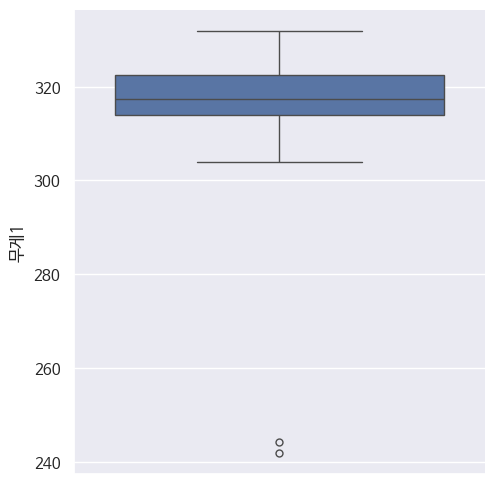

In [ ]:
# 한글 폰트 인식
sns.catplot(data = ost_df,
            y = "무게1",
            kind = "box")
plt.show()

In [ ]:
filter = (ost_df["무게1"] <= 250)
ost_df.loc[filter]

,무게1,무게2,무게3,무게4,무게5,무게6
0,242.0,242.0,242.0,242.0,242.0,242.0
1,244.3,244.3,244.3,244.3,244.3,244.3


In [ ]:
ost_df.drop(ost_df[filter].index, inplace = True)

In [ ]:
# 이상치 제거후: p = 0.176, p >= 0.05 이므로 귀무가설(H0) 채택 -> 정규분포
pg.normality(ost_df).round(3).T

# 3.기술통계부터 다시 분석

,무게1,무게2,무게3,무게4,무게5,무게6
W,0.982,0.986,0.986,0.985,0.982,0.964
pval,0.176,0.361,0.365,0.311,0.176,0.008
normal,True,True,True,True,True,False


## 6.wilcoxon test(비모수통계분석)

In [ ]:
# p = 0.008, p < 0.05 이므로 귀무가설(H0) 기각 -> 비정규분포

pg.normality(ost_df["무게6"]).round(3)

,W,pval,normal
무게6,0.964,0.008,False


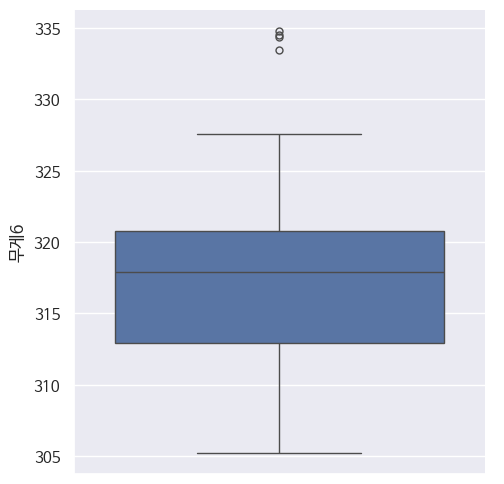

In [ ]:
sns.catplot(data = ost_df,
            y = "무게6",
            kind = "box")
plt.show()

In [ ]:
filter = (ost_df["무게6"] >= 330)
ost_df.loc[filter]

,무게1,무게2,무게3,무게4,무게5,무게6
41,330.5,331.3,331.3,333.5,335.5,333.5
42,331.4,332.2,332.2,334.4,336.4,334.4
43,331.8,332.6,332.6,334.8,336.8,334.8
99,331.5,332.3,332.3,334.5,336.5,334.5


In [ ]:
ost_df.drop(ost_df[filter].index, inplace = True)

In [ ]:
# p = 	0.004, p < 0.05 이므로 귀무가설(H0) 기각 -> 비정규분포

pg.normality(ost_df["무게6"]).round(3)

,W,pval,normal
무게6,0.959,0.004,False


In [ ]:
# p = 0.000, p < 0.05 이므로 귀무가설(H0) 기각 -> 320보다 작다
pg.wilcoxon(ost_df["무게6"] - 320, alternative = "less").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,997.5,less,0.0,-0.562,NaN


In [ ]:
# 모수통계 결과와 비교
pg.ttest(ost_df["무게6"], 320, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.413,95,less,0.0,"[-inf, 317.73]",0.552,5.776e+04,1.0


## 7.검증결과 그래프

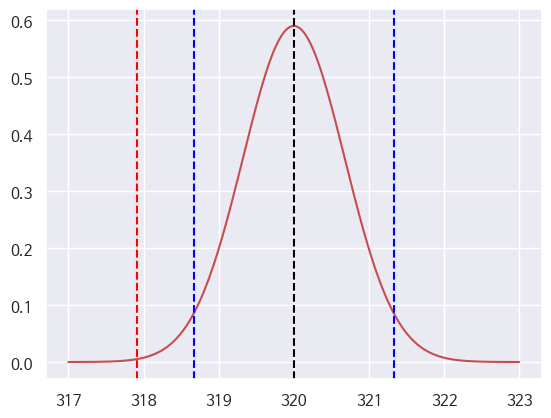

In [ ]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(317, 323, 200)

mu = 320   # 모집단 평균
x = 317.91 # 표본평균
se = 6.77/np.sqrt(100) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = se), 'r-')
plt.axvline(x = mu, color='black', linestyle='--')
plt.axvline(x = mu - 1.96 * se, color='blue', linestyle='--')
plt.axvline(x = mu + 1.96 * se, color='blue', linestyle='--')
plt.axvline(x = x, color='red', linestyle='--')
plt.show()

## 8.단일모집단 비율검정(proportion)

In [ ]:
# One Sample T Test of Proportion
# p = 0.482, p >= 0.05이므로 귀무가설(H0) 채택 -> 0.09라고 할수 있다.

from statsmodels.stats.proportion import proportions_ztest

z, p = proportions_ztest(count = 50,
                         nobs = 500,
                         value = 0.09)
print('z : {}, p : {}'.format(z, p))

z : 0.7453559924999305, p : 0.45605654025025566


In [ ]:
# 이항분포로 검정 n*p < 5 일때
stats.binomtest(50, n = 450 , p = 0.09, alternative="two-sided")

BinomTestResult(k=50, n=450, alternative='two-sided', statistic=0.1111111111111111, pvalue=0.11762769673872012)

## 9.동등성(Equivalence test)

In [ ]:
# p = 0.294, p >= 0.05 이므로 귀무가설(H0) 채택 -> 동등하지 않다
# D: difference(X), equivalence(X)
pg.tost(ost_df["무게1"],
        y = 320,
        bound = 3).round(3)

,bound,dof,pval
TOST,3,95,0.294


In [ ]:
# p = 0.000, p < 0.05 이므로 귀무가설(H0) 기각 -> 동등하다
# C: difference(O), equivalence(O)
pg.tost(ost_df["무게4"],
        y = 320,
        bound = 3).round(3)

,bound,dof,pval
TOST,3,95,0.0


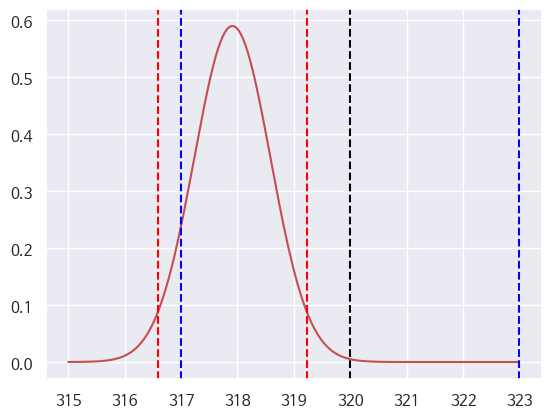

In [ ]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(315, 323, 200)

mu = 320   # 모집단 평균
eb = 3
x = 317.91 # 표본평균
se = 6.77/np.sqrt(100) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = x, scale = se), 'r-')
plt.axvline(x = mu, color='black', linestyle='--')
#차이검정
plt.axvline(x = x - 1.96 * se, color='red', linestyle='--')
plt.axvline(x = x + 1.96 * se, color='red', linestyle='--')
#동등성검정
plt.axvline(x = mu - 3, color='blue', linestyle='--')
plt.axvline(x = mu + 3, color='blue', linestyle='--')
plt.show()